#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# From sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

Reading pre-processed data:

In [2]:
customers = pd.read_csv('data/customers_scaled.csv')
customers.drop(['Unnamed: 0'], axis = 1, inplace = True)
customers.head()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_KATALOGNUTZER,...,CAMEO_DEUG_2015_3.0,CAMEO_DEUG_2015_4.0,CAMEO_DEUG_2015_5.0,CAMEO_DEUG_2015_6.0,CAMEO_DEUG_2015_7.0,CAMEO_DEUG_2015_8.0,CAMEO_DEUG_2015_9.0,CUSTOMER_GROUP,PRODUCT_GROUP,ONLINE_PURCHASE
0,-0.659219,0.305914,-0.301660,-0.62835,-0.485264,-0.288380,-0.576981,-2.113706,-0.670910,-0.007147,...,-0.325791,-0.781064,-0.254590,-0.328985,-0.241456,-0.270299,-0.185749,MULTI_BUYER,COSMETIC_AND_FOOD,0
1,3.412655,-1.023070,-0.058009,-0.62835,0.219071,-0.042504,-0.576981,0.858276,-0.122376,-0.007147,...,-0.325791,1.280305,-0.254590,-0.328985,-0.241456,-0.270299,-0.185749,SINGLE_BUYER,FOOD,0
2,-0.659219,-1.909060,-0.301660,-0.62835,-1.189598,-0.288380,-0.576981,-0.132385,1.523225,0.724205,...,-0.325791,-0.781064,3.927881,-0.328985,-0.241456,-0.270299,-0.185749,MULTI_BUYER,COSMETIC_AND_FOOD,0
3,-0.659219,-0.137081,-0.382877,-0.62835,-1.893933,-0.288380,-0.576981,-2.113706,1.523225,0.724205,...,-0.325791,1.280305,-0.254590,-0.328985,-0.241456,-0.270299,-0.185749,MULTI_BUYER,COSMETIC,0
4,-0.659219,1.191903,0.185642,-0.62835,0.923405,0.203373,-0.576981,-0.132385,-0.670910,-0.007147,...,-0.325791,-0.781064,-0.254590,-0.328985,4.141534,-0.270299,-0.185749,MULTI_BUYER,FOOD,0


In [3]:
azdias = pd.read_csv('data/azdias_scaled.csv')
azdias.drop(['Unnamed: 0'], axis = 1, inplace = True)
azdias.head()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_KATALOGNUTZER,...,REGIOTYP_7.0,CAMEO_DEUG_2015_1.0,CAMEO_DEUG_2015_2.0,CAMEO_DEUG_2015_3.0,CAMEO_DEUG_2015_4.0,CAMEO_DEUG_2015_5.0,CAMEO_DEUG_2015_6.0,CAMEO_DEUG_2015_7.0,CAMEO_DEUG_2015_8.0,CAMEO_DEUG_2015_9.0
0,-0.111007,-1.112826,-0.258584,3.036168,1.639856,-0.236872,3.329521,0.759038,-0.066279,1.114571,...,-0.322464,-0.205798,-0.320952,-0.328443,1.839714,-0.25723,-0.367167,-0.309555,-0.421484,-0.371684
1,1.322701,1.653534,0.212895,-0.405415,0.066823,0.351053,-0.303045,-0.263304,0.901677,-1.569339,...,-0.322464,-0.205798,-0.320952,-0.328443,-0.543563,-0.25723,-0.367167,-0.309555,2.372570,-0.371684
2,1.322701,1.002626,0.145541,-0.405415,-0.719693,-0.016400,-0.303045,-0.263304,-1.034235,-0.898362,...,-0.322464,-0.205798,-0.320952,-0.328443,1.839714,-0.25723,-0.367167,-0.309555,-0.421484,-0.371684
3,-0.971232,0.351718,-0.460647,-0.405415,-1.506210,-0.383853,-0.303045,-1.285646,-0.066279,-0.227384,...,-0.322464,-0.205798,3.115734,-0.328443,-0.543563,-0.25723,-0.367167,-0.309555,-0.421484,-0.371684
4,-0.971232,0.514445,-0.325938,-0.405415,1.639856,-0.310363,-0.303045,0.759038,-1.034235,-0.227384,...,-0.322464,-0.205798,-0.320952,-0.328443,-0.543563,-0.25723,2.723555,-0.309555,-0.421484,-0.371684


In [4]:
set(customers.columns) - set(azdias.columns)

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [5]:
set(azdias.columns)- set(customers.columns)

set()

In [6]:
customers_att = customers.iloc[:, :-3]

### Principal component analysis

In [7]:
#N_COMPONENTS = 200
pca = PCA() 

# Transform features
azdias_pca = pca.fit_transform(azdias)

In [8]:
n_components = len(pca.components_)
n_components

262

In [9]:
# Explained variante ratio of each component
exp_variance = pca.explained_variance_ratio_

cumsum_variance = np.cumsum(pca.explained_variance_ratio_)

In [10]:
(cumsum_variance <= 0.5).sum() + 1

24

In [11]:
cumsum_variance[23]

0.5034863162608224

Text(26, 0.25515053473512883, 'explained_variance = 50%')

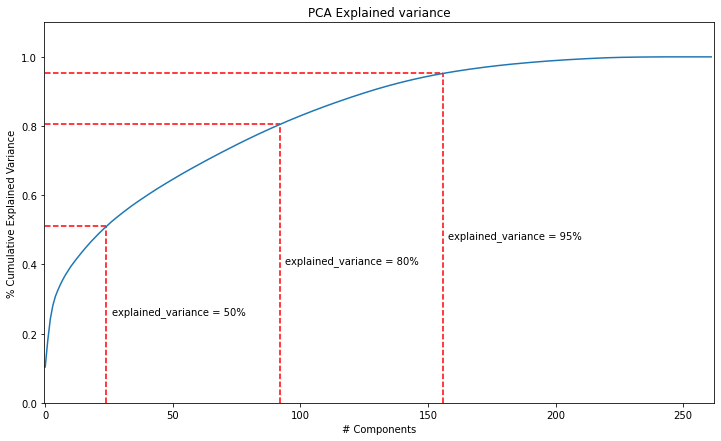

In [12]:
plt.figure(figsize=(12,7))
plt.plot(cumsum_variance)
plt.ylabel('% Cumulative Explained Variance')
plt.xlabel('# Components')
plt.title('PCA Explained variance')
plt.ylim(0, 1.1)
plt.xlim(-0.4, n_components)

# 95% explained variance
components_95 = (cumsum_variance <= 0.95).sum() + 1
plt.vlines(x = components_95, ymin = 0, ymax = cumsum_variance[components_95], color='red', linestyles='--')
plt.hlines(y=cumsum_variance[components_95], xmin=0, xmax=components_95, color='red', linestyles='--')
plt.text(x = components_95 + 2, y = cumsum_variance[components_95] / 2, s = 'explained_variance = 95%' )


# 80% explained variance
components_80 = (cumsum_variance <= 0.80).sum() + 1
plt.vlines(x = components_80, ymin = 0, ymax = cumsum_variance[components_80], color='red', linestyles='--')
plt.hlines(y=cumsum_variance[components_80], xmin=0, xmax=components_80, color='red', linestyles='--')
plt.text(x = components_80 + 2, y = cumsum_variance[components_80] / 2, s = 'explained_variance = 80%' )

# 50% explained variance
components_50 = (cumsum_variance <= 0.50).sum() + 1
plt.vlines(x = components_50, ymin = 0, ymax = cumsum_variance[components_50], color='red', linestyles='--')
plt.hlines(y=cumsum_variance[components_50], xmin=0, xmax=components_50, color='red', linestyles='--')
plt.text(x = components_50 + 2, y = cumsum_variance[components_50] / 2, s = 'explained_variance = 50%' )

### Component interpretation

In [13]:
def display_component(v, features_list, component_num, n_weights=10):
    global n_components
    
    # get index of component (last row - component_num)
    row_idx = n_components - component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()

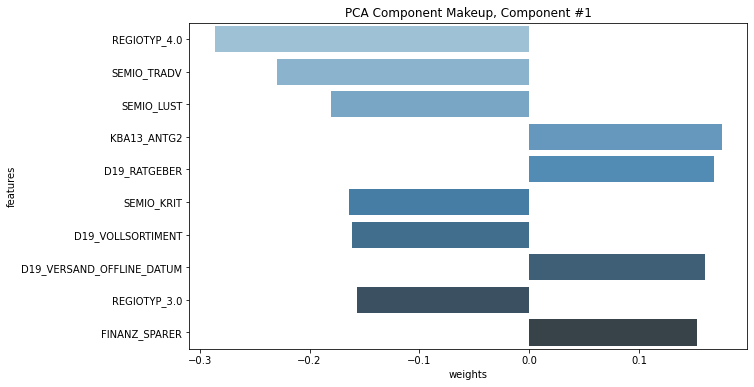

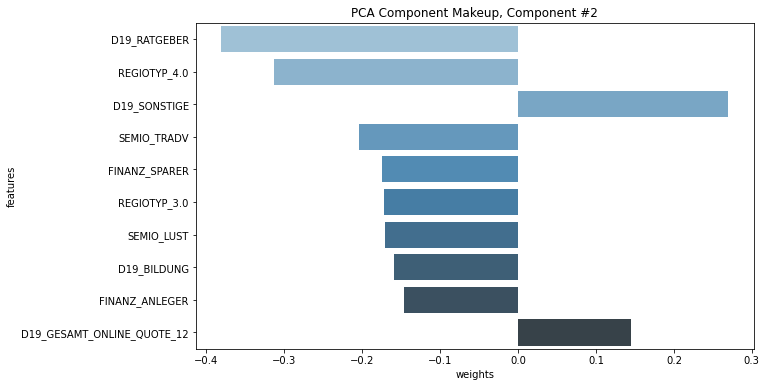

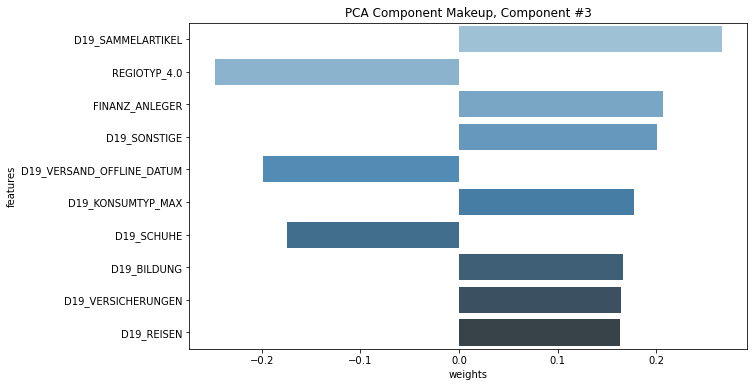

In [14]:
# display makeup of the first three components
display_component(pd.DataFrame( pca.components_ ), azdias.columns.values, component_num = 1, n_weights = 10)
display_component(pd.DataFrame( pca.components_ ), azdias.columns.values, component_num = 2, n_weights=10)
display_component(pd.DataFrame( pca.components_ ), azdias.columns.values, component_num = 3, n_weights=10)

### Clustering

We will cluster the general population and then see in which clusters the customers' subset is.

We will use a PCA with a explained_variance of 80%.

In [15]:
#N_COMPONENTS = 200
pca = PCA(n_components = 0.8) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

### Elbow method for *k* selection

In [18]:
neg_scores = []

for k in range(2, 21):
    print(k)
    kmeans = KMeans(k)
    clusters = kmeans.fit(azdias_pca)
    neg_scores.append( clusters.inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


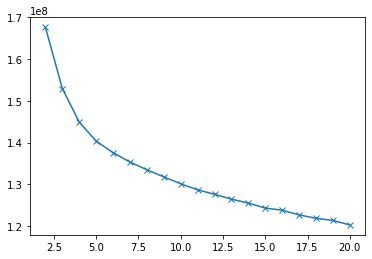

In [20]:
plt.plot(range(2,21), neg_scores, marker = 'x')

In [21]:
#N_COMPONENTS = 200
pca = PCA(n_components = 0.95) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

In [22]:
neg_scores = []

for k in range(2, 21):
    print(k)
    kmeans = KMeans(k)
    clusters = kmeans.fit(azdias_pca)
    neg_scores.append( clusters.inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


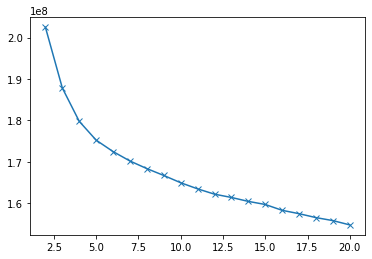

In [23]:
plt.plot(range(2,21), neg_scores, marker = 'x')

In [24]:
#N_COMPONENTS = 200
pca = PCA(n_components = 0.5) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

In [25]:
neg_scores = []

for k in range(2, 21):
    print(k)
    kmeans = KMeans(k)
    clusters = kmeans.fit(azdias_pca)
    neg_scores.append( clusters.inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


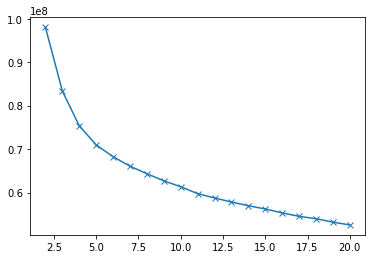

In [26]:
plt.plot(range(2,21), neg_scores, marker = 'x')

## Pendiente

Hay que hacer plot de barras de azdias... 

Decidir un n para 0.95, y ver a cuantas dimensiones equipara...

Usar ese numero de dimensiones para ajustar el PCA de azdias

Hacer el plot de barras

Hacer observaciones.... 

In [98]:
pca = PCA(0.5) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

In [99]:
n_comp = len(pca.components_)

In [100]:
k = 9
kmeans = KMeans(k)
clusters = kmeans.fit(azdias_pca)

In [101]:
c = clusters.predict(azdias_pca)

In [102]:
customers_pca = pca.transform(customers_att)

In [103]:
customer_clusters = clusters.predict(customers_pca)

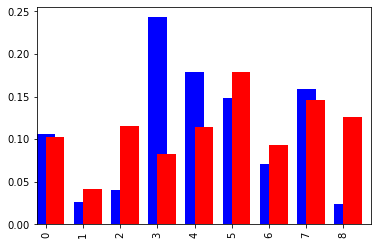

In [104]:
#pd.Series(c).value_counts(normalize = True).plot.bar()
pd.Series(customer_clusters).value_counts(normalize = True).sort_index().plot.bar(color = 'blue', width = 0.5, align = 'center')

pd.Series(c).value_counts(normalize = True).sort_index().plot.bar(color = 'red', width = 0.5, align = 'edge')

plt.show()

In [114]:
pca = PCA(0.75) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

# Number of components
n_comp = len(pca.components_)

k = 11
kmeans = KMeans(k)
clusters = kmeans.fit(azdias_pca)

c = clusters.predict(azdias_pca)

In [115]:
customers_pca = pca.transform(customers_att)

In [116]:
customer_clusters = clusters.predict(customers_pca)

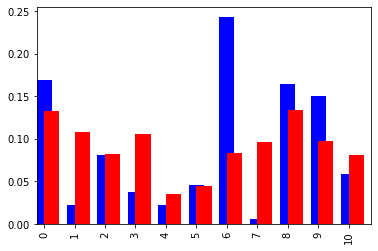

In [117]:
#pd.Series(c).value_counts(normalize = True).plot.bar()
pd.Series(customer_clusters).value_counts(normalize = True).sort_index().plot.bar(color = 'blue', width = 0.5, align = 'center')

pd.Series(c).value_counts(normalize = True).sort_index().plot.bar(color = 'red', width = 0.5, align = 'edge')

plt.show()

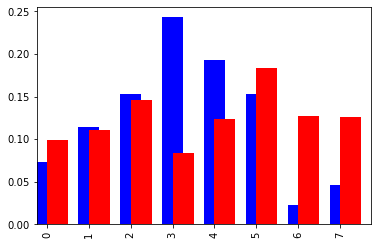

In [113]:
pca = PCA(0.8) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

# Number of components
n_comp = len(pca.components_)

k = 8
kmeans = KMeans(k)
clusters = kmeans.fit(azdias_pca)

c = clusters.predict(azdias_pca)

customers_pca = pca.transform(customers_att)

customer_clusters = clusters.predict(customers_pca)

pd.Series(customer_clusters).value_counts(normalize = True).sort_index().plot.bar(color = 'blue', width = 0.5, align = 'center')

pd.Series(c).value_counts(normalize = True).sort_index().plot.bar(color = 'red', width = 0.5, align = 'edge')

plt.show()

In [109]:
pca = PCA(0.95) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

# Number of components
n_comp = len(pca.components_)

k = 11
kmeans = KMeans(k)
clusters = kmeans.fit(azdias_pca)

c = clusters.predict(azdias_pca)

In [110]:
customers_pca = pca.transform(customers_att)

In [111]:
customer_clusters = clusters.predict(customers_pca)

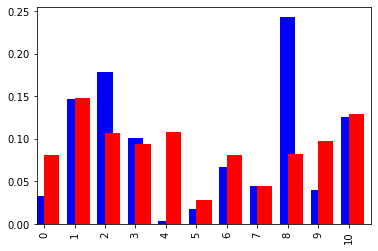

In [112]:
#pd.Series(c).value_counts(normalize = True).plot.bar()
pd.Series(customer_clusters).value_counts(normalize = True).sort_index().plot.bar(color = 'blue', width = 0.5, align = 'center')

pd.Series(c).value_counts(normalize = True).sort_index().plot.bar(color = 'red', width = 0.5, align = 'edge')

plt.show()

In [ ]:
# seleccionado 0.9 y k = 10

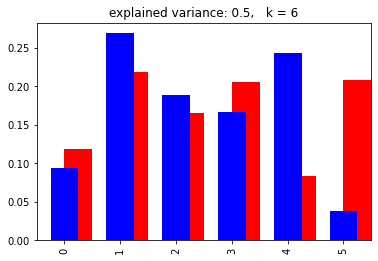

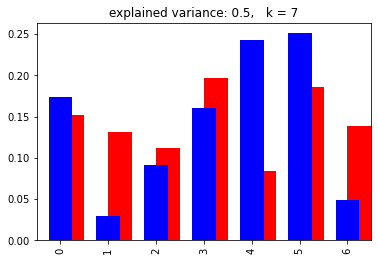

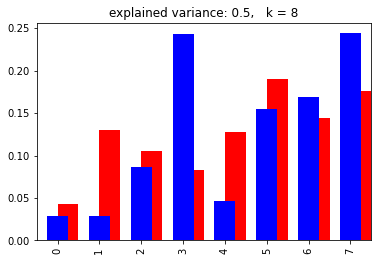

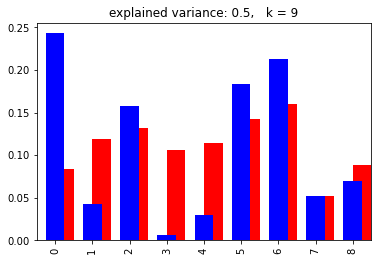

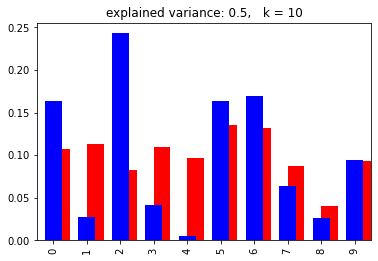

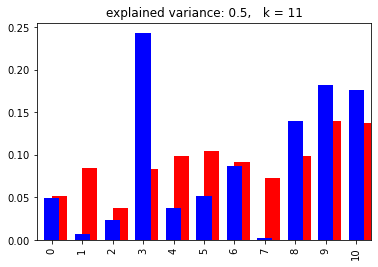

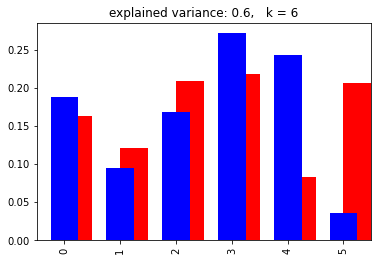

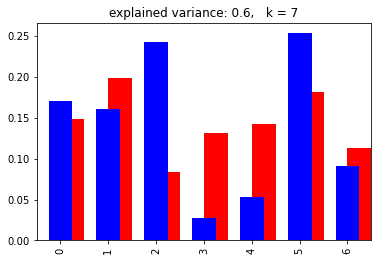

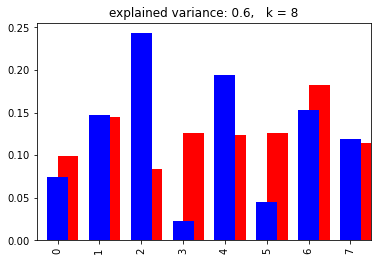

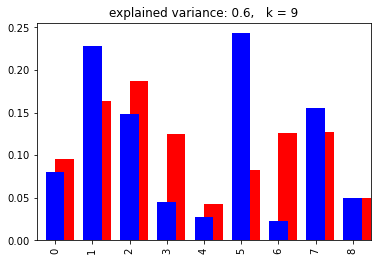

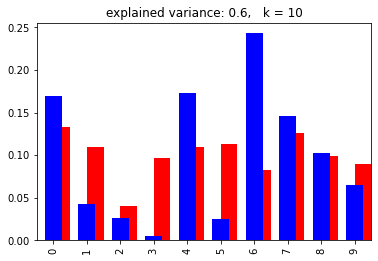

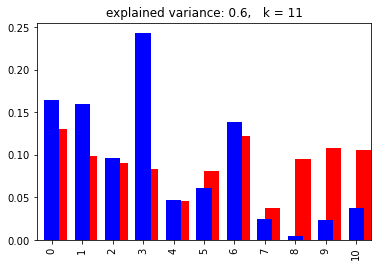

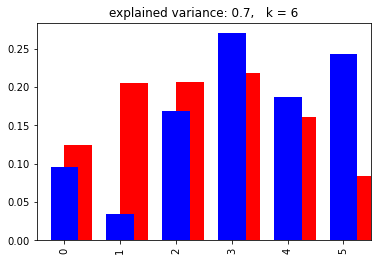

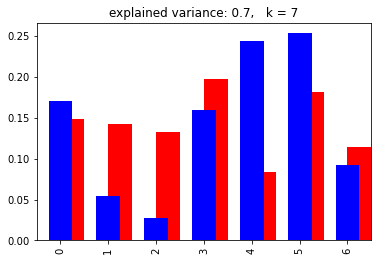

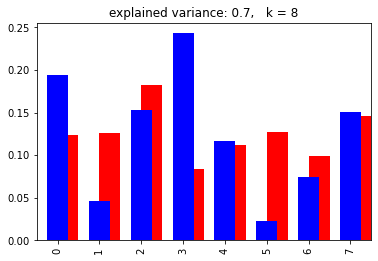

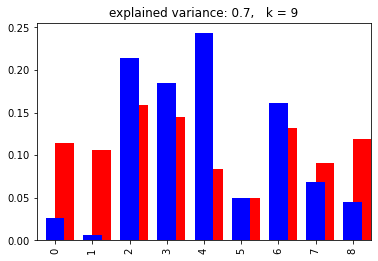

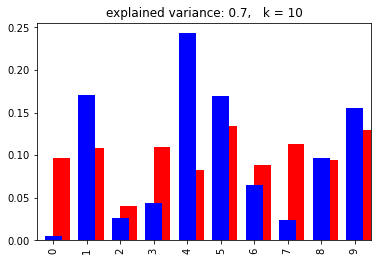

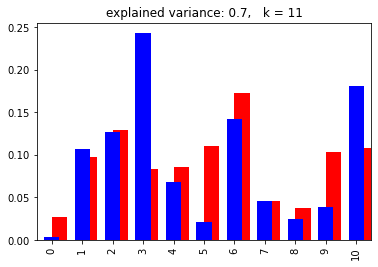

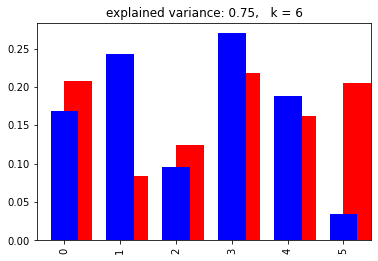

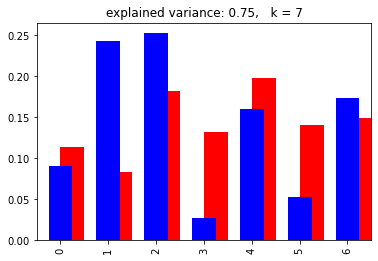

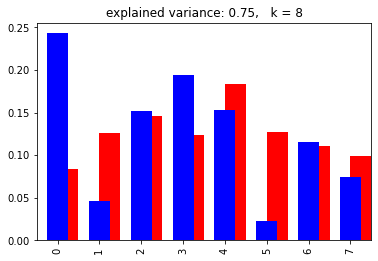

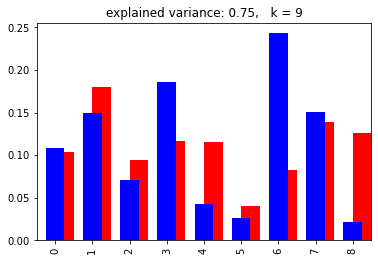

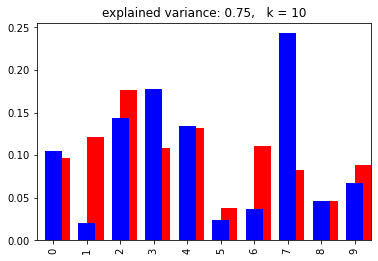

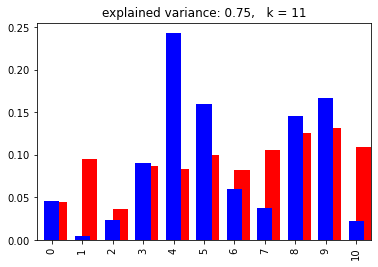

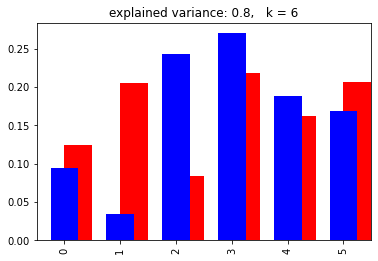

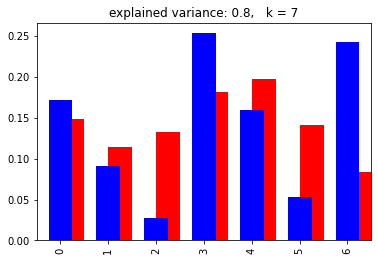

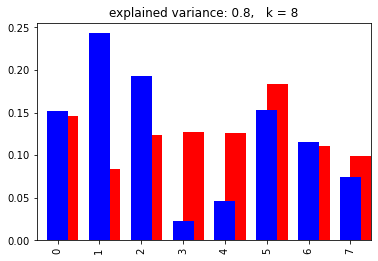

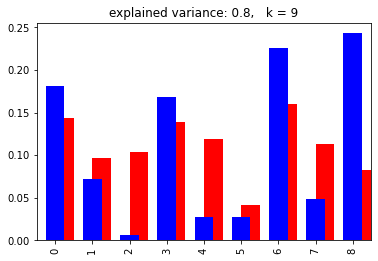

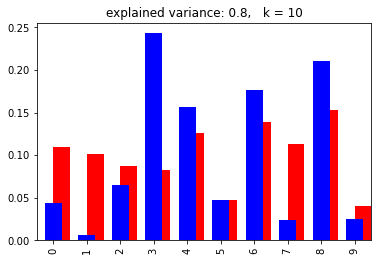

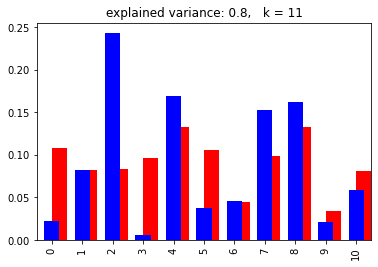

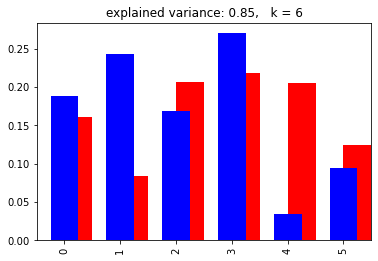

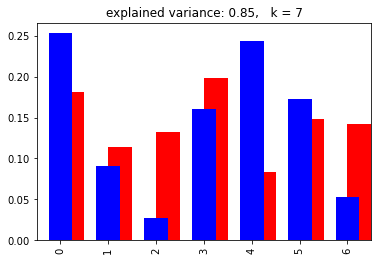

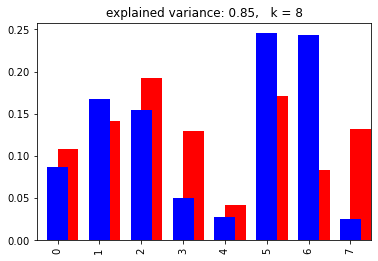

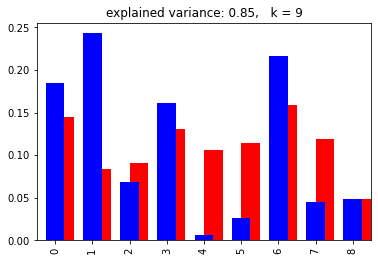

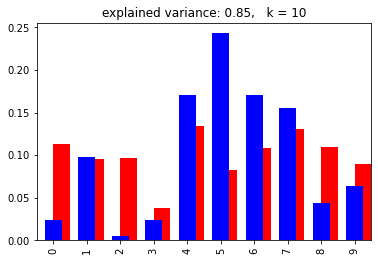

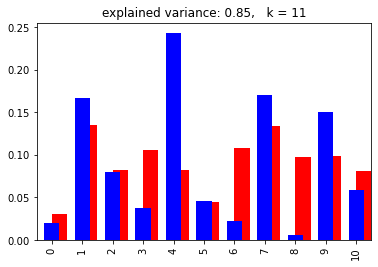

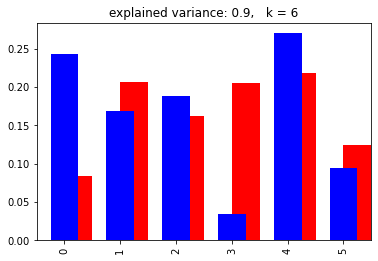

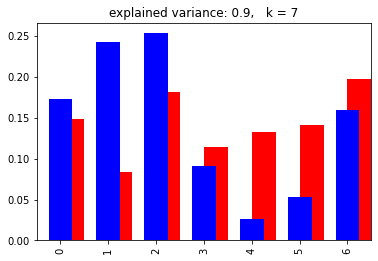

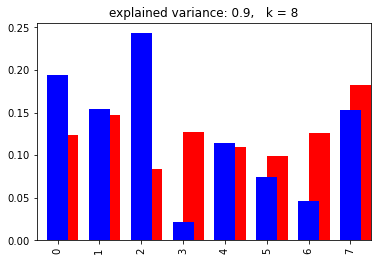

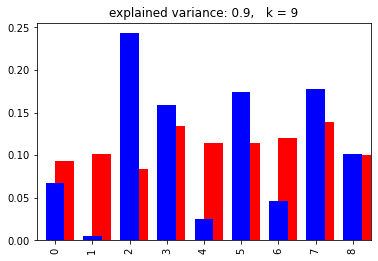

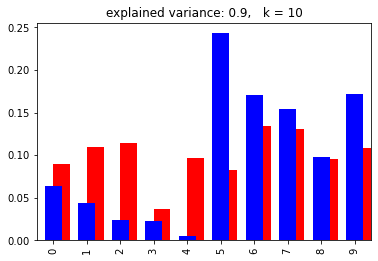

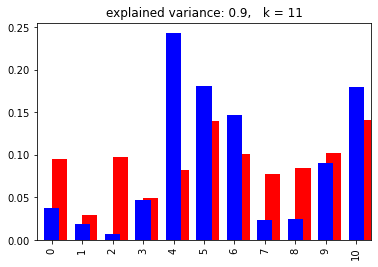

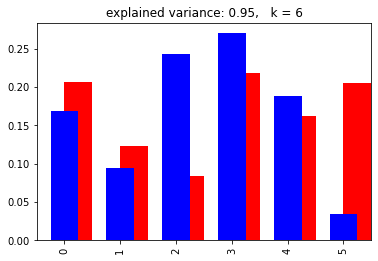

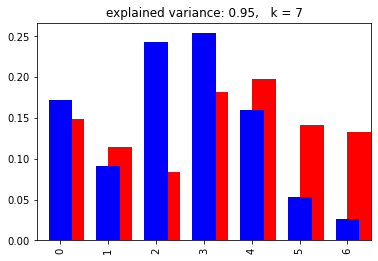

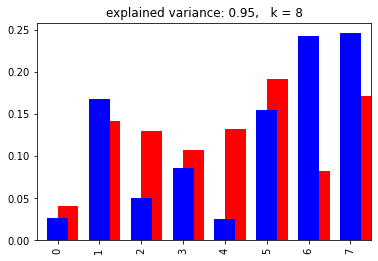

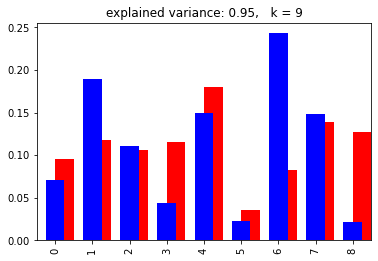

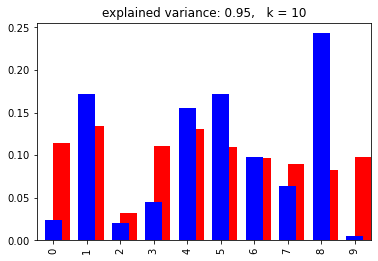

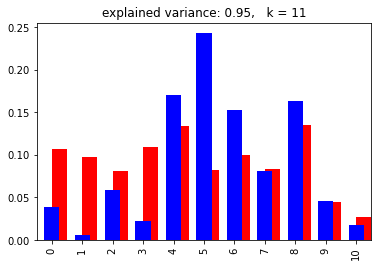

In [137]:
explained_variance = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
k_list = [6, 7, 8, 9, 10, 11]

for var in explained_variance:
    pca = PCA(var) 
    
    # Transform features
    azdias_pca = pca.fit_transform(azdias)
    
    for k in k_list:
        plt.figure()
        kmeans = KMeans(k)
        clusters = kmeans.fit(azdias_pca)
        preds_azdias = clusters.predict(azdias_pca)
        pd.Series(preds_azdias).value_counts(normalize = True).sort_index().plot.bar(color = 'red', width = 0.5, align = 'edge')
        plt.title('explained variance: {},   k = {}'.format(var, k))
        
        
        # Transform customers
        customers_pca = pca.transform(customers_att)
        preds_customers = clusters.predict(customers_pca)
        pd.Series(preds_customers).value_counts(normalize = True).sort_index().plot.bar(color = 'blue', width = 0.5, align = 'center')
        plt.show()

<AxesSubplot:>

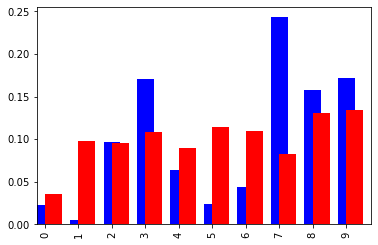

In [141]:
pca = PCA(0.9) 

# Transform features
azdias_pca = pca.fit_transform(azdias)

k = 10
kmeans = KMeans(k)
clusters = kmeans.fit(azdias_pca)

c = clusters.predict(azdias_pca)

customers_pca = pca.transform(customers_att)

customer_clusters = clusters.predict(customers_pca)

pd.Series(customer_clusters).value_counts(normalize = True).sort_index().plot.bar(color = 'blue', width = 0.5, align = 'center')

pd.Series(c).value_counts(normalize = True).sort_index().plot.bar(color = 'red', width = 0.5, align = 'edge')

CORREGIR LA DE INTERPRETACIÓN.... PARA QUE NO USE VARIABLES GLOBALES

SEGUIR MICHAN
    - Ejemplificar algunos attributos....
    - Si un ejemplo 

In [29]:
# Ver cuales Componentes tienen mayor peso
clusters.cluster_centers_

array([[ 2.54010372e+00,  1.11848085e-01, -4.89334212e+00,
         1.10651960e-01,  9.63788609e-01, -2.67946880e+00,
         1.56229037e+00,  4.24152473e-01,  8.07314504e-01,
        -1.22178035e-01, -9.36834221e-01,  3.58255407e-01,
        -3.55821775e-01,  1.76980125e-01, -8.20300202e-02,
         6.58544736e-01, -6.05544768e-02,  2.70690009e-01,
         5.42895905e-02,  7.63478822e-02,  1.07483751e-01,
        -6.68710035e-02,  3.42775761e-02,  4.60570201e-02],
       [ 2.88739997e+00, -5.72171338e-02,  6.62027944e+00,
         2.56717040e+00, -4.41357917e-01,  3.04801395e-01,
        -1.01317699e-01, -4.44385862e-01, -8.01776011e-01,
         7.86425256e-01, -9.33911090e-01, -2.97073005e-02,
         1.20886290e-01,  7.93033899e-02,  7.50212316e-02,
         3.14405762e-01, -4.63746018e-01,  3.24779954e-01,
        -2.22612619e-01, -3.86832570e-02, -7.35908141e-01,
         1.05149923e-01, -1.10372088e-01,  4.18388380e-02],
       [-1.29557229e+01,  8.45837688e+00, -3.00757385e

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [2]:
# mailout_train = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv')

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [3]:
#mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')